## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()

# Display the number of unique values for each column
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
application_types_to_replace = application_type_counts[application_type_counts < threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
threshold = 1000
classifications_to_replace = classification_counts[classification_counts < threshold].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)
print(application_df_encoded.head())


   STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                       0   
1       1   108590              1                       0   
2       1     5000              0                       0   
3       1     6692              1                       0   
4       1   142590              1                       0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                     1                     0                    0   
1                     0                     0                    1   
2                     0                     0                    0   
3                     0                     0                    1   
4                     0                     0                    1   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                    0                    0                    0  ...   
1                    0                    0                    0  

In [10]:

# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop("IS_SUCCESSFUL", axis=1).values
y =application_df_encoded["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = X_train.shape[1]
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(units=num_features*2, activation="relu", input_dim=num_features))
nn.add(Dropout(0.2))
# Second hidden layer
nn.add(Dense(units=num_features*2, activation="relu"))
nn.add(Dropout(0.2))
# Output layer
nn.add(Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 86)                3784      
                                                                 
 dropout (Dropout)           (None, 86)                0         
                                                                 
 dense_1 (Dense)             (None, 86)                7482      
                                                                 
 dropout_1 (Dropout)         (None, 86)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 87        
                                                                 
Total params: 11353 (44.35 KB)
Trainable params: 11353 (44.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
# Compile the model
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss='binary_crossentropy',
           metrics=['accuracy'])


In [14]:
# Implement early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                   validation_data=(X_test_scaled, y_test), verbose=1, 
                   callbacks=[early_stop])

Epoch 1/100
804/804 [==============================] - 10s 8ms/step - loss: 0.5882 - accuracy: 0.7126 - val_loss: 0.5644 - val_accuracy: 0.7209
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5636 - accuracy: 0.7283 - val_loss: 0.5607 - val_accuracy: 0.7220
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5585 - accuracy: 0.7297 - val_loss: 0.5584 - val_accuracy: 0.7206
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5579 - accuracy: 0.7308 - val_loss: 0.5560 - val_accuracy: 0.7249
Epoch 5/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5563 - accuracy: 0.7299 - val_loss: 0.5567 - val_accuracy: 0.7257
Epoch 6/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5547 - accuracy: 0.7303 - val_loss: 0.5567 - val_accuracy: 0.7242
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5532 - accuracy: 0.7343 - val_loss: 0.5542 - val_accuracy: 0.725

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5530 - accuracy: 0.7261 - 382ms/epoch - 1ms/step
Loss: 0.5530238151550293, Accuracy: 0.726064145565033


In [17]:
# Export our model to HDF5 file
import os
if not os.path.exists('model'):
    os.makedirs('model')
model_path = "model/AlphabetSoupCharity_Optimization.h5"
nn.save(model_path)
print(f"Model saved at {model_path}")

Model saved at model/AlphabetSoupCharity_Optimization.h5


c:\Users\Nazanin\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np


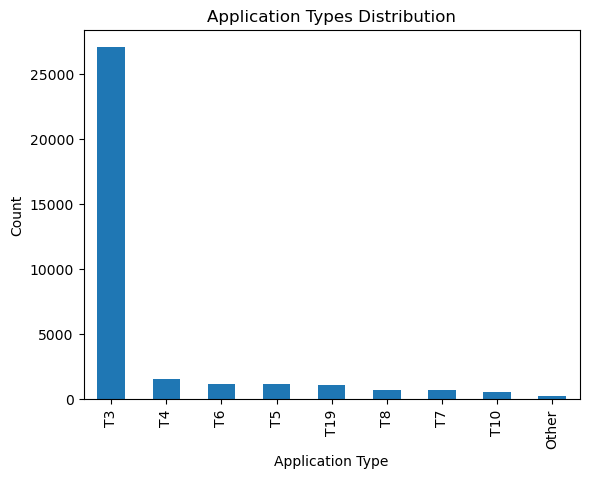

In [19]:
#Data Distribution:
if not os.path.exists('Image'):
    os.makedirs('Image')

application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar', title='Application Types Distribution')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.savefig('Image/application_type_distribution.png', bbox_inches='tight')  # Saves the figure
plt.show()

C:\Users\Nazanin\AppData\Local\Temp\ipykernel_5476\2216977871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = application_df.corr()


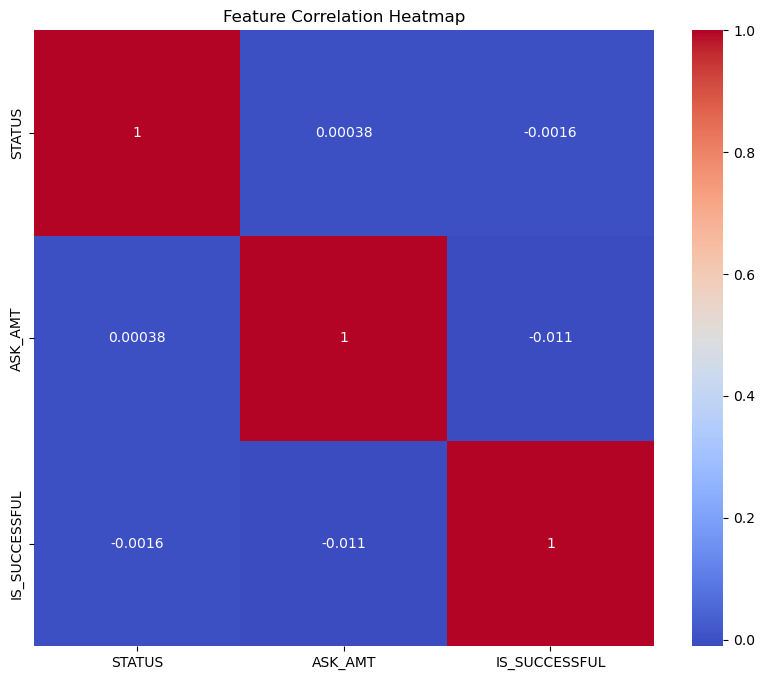

In [20]:
#Correlation Heatmap:
correlation = application_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('Image/correlation_heatmap.png', bbox_inches='tight')  # Saves the figure
plt.show()

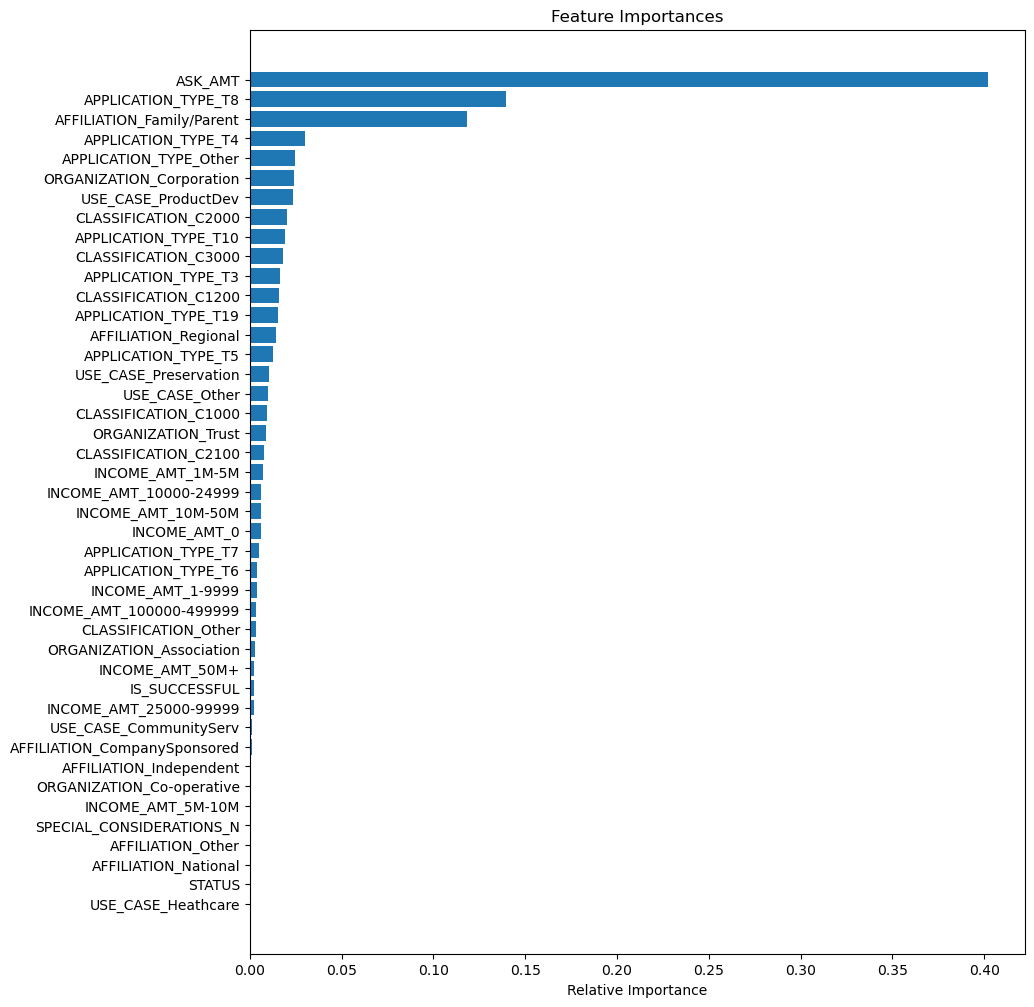

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_

features = application_df_encoded.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('Image/feature_importance.png', bbox_inches='tight')
plt.show()
